# **Expt6_122021601009_Abhishek_Neural_network_for_classification**

In [3]:
#importing libraries
import numpy as np #for array operations
import tensorflow as tf #to import tensorflow interfaces
import matplotlib.pyplot as plt #for visualization
import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("Training data shape: ", x_train.shape)
print("Test data shape", x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


8


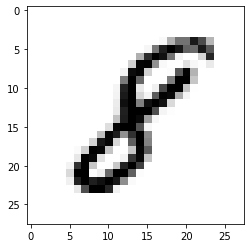

In [6]:
image_index = 7777
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys' )

In [7]:
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print( "First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [9]:
image_size = 784 # 28*28
num_classes = 10 # ten unique digits
model = Sequential()

In [10]:
# The input layer requires the special input _shape parameter which should match the shape of
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size, )))
model.add(Dense(units=num_classes, activation='softmax' ) )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=[ 'accuracy' ])
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=.3)

Epoch 1/10
329/329 [==============================] - 14s 4ms/step - loss: 1.8990 - accuracy: 0.4001 - val_loss: 1.2024 - val_accuracy: 0.7583
Epoch 2/10
329/329 [==============================] - 1s 3ms/step - loss: 1.1188 - accuracy: 0.7728 - val_loss: 0.8946 - val_accuracy: 0.8228
Epoch 3/10
329/329 [==============================] - 1s 3ms/step - loss: 0.8624 - accuracy: 0.8285 - val_loss: 0.7363 - val_accuracy: 0.8506
Epoch 4/10
329/329 [==============================] - 1s 3ms/step - loss: 0.7214 - accuracy: 0.8528 - val_loss: 0.6600 - val_accuracy: 0.8608
Epoch 5/10
329/329 [==============================] - 1s 3ms/step - loss: 0.6386 - accuracy: 0.8624 - val_loss: 0.6617 - val_accuracy: 0.8577
Epoch 6/10
329/329 [==============================] - 1s 3ms/step - loss: 0.6050 - accuracy: 0.8661 - val_loss: 0.5371 - val_accuracy: 0.8772
Epoch 7/10
329/329 [==============================] - 1s 3ms/step - loss: 0.5352 - accuracy: 0.8787 - val_loss: 0.5067 - val_accuracy: 0.8798
Epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


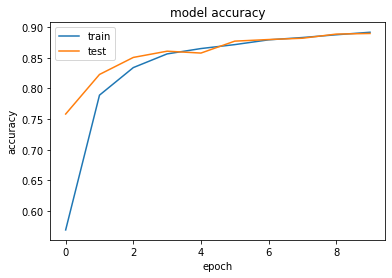

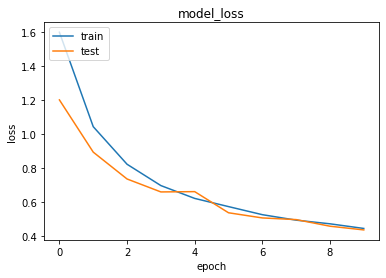

In [13]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
history.history
plt.plot(history.history['accuracy'])
plt.plot(history.history[ 'val_accuracy'])
plt.title( 'model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper_left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()